# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
import seaborn as sns
from ratelimiter import RateLimiter

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# API URL, and units
target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

#print(api_key)

1806b5c780467850aa23fdc4ca10a810


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#Dataframe displaying the individual latitude/longitude pairings
latlong_df = pd.DataFrame({"lat":lats, "long":lngs})
latlong_df.head()

,lat,long
0,17.221576,88.784869
1,-9.794995,174.060657
2,31.014983,-5.360451
3,-35.724643,32.366131
4,66.216462,-50.546310


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Create dataframe of just the cities, then drop duplicates and NaNs
city_df = pd.DataFrame({"cities":cities})

city_uniq_df = city_df.dropna()
city_uniq_df = city_uniq_df.drop_duplicates()

#New number of cities
len(city_uniq_df)

591

In [8]:
#Create lists for the different variables

city_name = []
country_name = []
cloud = []
date = []
lats = []
lngs = []
humidity = []
max_temp = []
wind_speed = []

#Protect API key with a rate as per the free Open Weather API plan
rate_limiter = RateLimiter(max_calls=60, period=60)
print("Beginning Data Retrieval\n------------------------------\n")

#Loop through and organize appropriate data
for index, rows in city_uniq_df.iterrows():
    with rate_limiter:
        request = f'{target_url}{rows["cities"]}&units={units}&appid={api_key}'
        print(f'Processing Record {index+1} | {rows["cities"]}')
        print(request)
        
        current_city = requests.get(request).json()
        try:
            city_name.append(current_city["name"])
            country_name.append(current_city["sys"]["country"])
            cloud.append(current_city["clouds"]["all"])
            date.append(current_city["dt"])
            lats.append(current_city["coord"]["lat"])
            lngs.append(current_city["coord"]["lon"])
            humidity.append(current_city["main"]["humidity"])
            max_temp.append(current_city["main"]["temp"])
            wind_speed.append(current_city["wind"]["speed"])
        except:
            print(f'City not found. Skipping...')

print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
------------------------------

Processing Record 1) | paradwip
http://api.openweathermap.org/data/2.5/weather?q=paradwip&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
City not found. Skipping...
Processing Record 2) | lolua
http://api.openweathermap.org/data/2.5/weather?q=lolua&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
City not found. Skipping...
Processing Record 3) | mrirt
http://api.openweathermap.org/data/2.5/weather?q=mrirt&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
City not found. Skipping...
Processing Record 4) | umzimvubu
http://api.openweathermap.org/data/2.5/weather?q=umzimvubu&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
City not found. Skipping...
Processing Record 5) | nuuk
http://api.openweathermap.org/data/2.5/weather?q=nuuk&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 6) | georgetown
http://api.openweathermap.org/data/2.5/weather?q=georgetown&units=imperial&appid=1806b5c7804678

Processing Record 56) | pangnirtung
http://api.openweathermap.org/data/2.5/weather?q=pangnirtung&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 57) | adrar
http://api.openweathermap.org/data/2.5/weather?q=adrar&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 58) | bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 59) | high level
http://api.openweathermap.org/data/2.5/weather?q=high level&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 60) | mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 61) | moron
http://api.openweathermap.org/data/2.5/weather?q=moron&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 62) | coos bay
http://api.openweathermap.org/data/2.5/weather?q=coos bay&units=imperial&appid=1806b5c780467850aa

Processing Record 112) | halifax
http://api.openweathermap.org/data/2.5/weather?q=halifax&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 113) | pasni
http://api.openweathermap.org/data/2.5/weather?q=pasni&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 114) | jiamusi
http://api.openweathermap.org/data/2.5/weather?q=jiamusi&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 115) | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 116) | tautira
http://api.openweathermap.org/data/2.5/weather?q=tautira&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 117) | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 118) | gurskoye
http://api.openweathermap.org/data/2.5/weather?q=gurskoye&units=imperial&appid=1806b5c780467

Processing Record 167) | bur gabo
http://api.openweathermap.org/data/2.5/weather?q=bur gabo&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
City not found. Skipping...
Processing Record 168) | bodmin
http://api.openweathermap.org/data/2.5/weather?q=bodmin&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 169) | ganzhou
http://api.openweathermap.org/data/2.5/weather?q=ganzhou&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 170) | umm lajj
http://api.openweathermap.org/data/2.5/weather?q=umm lajj&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 171) | kampong chhnang
http://api.openweathermap.org/data/2.5/weather?q=kampong chhnang&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 172) | mys shmidta
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
City not found. Skipping...
Processing Record 173) | coihaique
http://api.openweat

Processing Record 223) | saskylakh
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 224) | henties bay
http://api.openweathermap.org/data/2.5/weather?q=henties bay&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 225) | marcona
http://api.openweathermap.org/data/2.5/weather?q=marcona&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
City not found. Skipping...
Processing Record 226) | san quintin
http://api.openweathermap.org/data/2.5/weather?q=san quintin&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 227) | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 228) | khromtau
http://api.openweathermap.org/data/2.5/weather?q=khromtau&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 229) | victoria
http://api.openweathermap.org/data/2.5/w

Processing Record 280) | nome
http://api.openweathermap.org/data/2.5/weather?q=nome&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 281) | margate
http://api.openweathermap.org/data/2.5/weather?q=margate&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 282) | zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?q=zapolyarnyy&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 283) | airai
http://api.openweathermap.org/data/2.5/weather?q=airai&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 284) | kokopo
http://api.openweathermap.org/data/2.5/weather?q=kokopo&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 285) | priyutnoye
http://api.openweathermap.org/data/2.5/weather?q=priyutnoye&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 286) | manggar
http://api.openweathermap.org/data/2.5/weather?q=manggar&units=imperial&appid=1806b5c780467850aa23fdc

Processing Record 337) | sao jose
http://api.openweathermap.org/data/2.5/weather?q=sao jose&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 338) | sambava
http://api.openweathermap.org/data/2.5/weather?q=sambava&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 339) | cairns
http://api.openweathermap.org/data/2.5/weather?q=cairns&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 340) | boralday
http://api.openweathermap.org/data/2.5/weather?q=boralday&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 341) | vilyuysk
http://api.openweathermap.org/data/2.5/weather?q=vilyuysk&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 342) | kakching
http://api.openweathermap.org/data/2.5/weather?q=kakching&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 343) | pedasi
http://api.openweathermap.org/data/2.5/weather?q=pedasi&units=imperial&appid=1806b5c780467850aa23f

Processing Record 392) | great yarmouth
http://api.openweathermap.org/data/2.5/weather?q=great yarmouth&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 393) | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?q=zhezkazgan&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 394) | dingle
http://api.openweathermap.org/data/2.5/weather?q=dingle&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 395) | katastarion
http://api.openweathermap.org/data/2.5/weather?q=katastarion&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 396) | sayyan
http://api.openweathermap.org/data/2.5/weather?q=sayyan&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 397) | raudeberg
http://api.openweathermap.org/data/2.5/weather?q=raudeberg&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 398) | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?q=batagay-alyta&units=

Processing Record 449) | yanam
http://api.openweathermap.org/data/2.5/weather?q=yanam&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 450) | faro
http://api.openweathermap.org/data/2.5/weather?q=faro&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 451) | volterra
http://api.openweathermap.org/data/2.5/weather?q=volterra&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 452) | wajid
http://api.openweathermap.org/data/2.5/weather?q=wajid&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 453) | luocheng
http://api.openweathermap.org/data/2.5/weather?q=luocheng&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 454) | uruzgan
http://api.openweathermap.org/data/2.5/weather?q=uruzgan&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 455) | korla
http://api.openweathermap.org/data/2.5/weather?q=korla&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
City n

Processing Record 505) | florianopolis
http://api.openweathermap.org/data/2.5/weather?q=florianopolis&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 506) | tynda
http://api.openweathermap.org/data/2.5/weather?q=tynda&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 507) | hit
http://api.openweathermap.org/data/2.5/weather?q=hit&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 508) | palmeira
http://api.openweathermap.org/data/2.5/weather?q=palmeira&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 509) | bereda
http://api.openweathermap.org/data/2.5/weather?q=bereda&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 510) | lethem
http://api.openweathermap.org/data/2.5/weather?q=lethem&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 511) | nguiu
http://api.openweathermap.org/data/2.5/weather?q=nguiu&units=imperial&appid=1806b5c780467850aa23fdc4ca10a81

Processing Record 560) | karak
http://api.openweathermap.org/data/2.5/weather?q=karak&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 561) | zhuhai
http://api.openweathermap.org/data/2.5/weather?q=zhuhai&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 562) | urzhum
http://api.openweathermap.org/data/2.5/weather?q=urzhum&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 563) | lodwar
http://api.openweathermap.org/data/2.5/weather?q=lodwar&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 564) | palmer
http://api.openweathermap.org/data/2.5/weather?q=palmer&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 565) | havoysund
http://api.openweathermap.org/data/2.5/weather?q=havoysund&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Processing Record 566) | collie
http://api.openweathermap.org/data/2.5/weather?q=collie&units=imperial&appid=1806b5c780467850aa23fdc4ca10a810
Pr

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create Data frame into a csv, removing empty values
city_uniq_df = city_uniq_df.dropna()

weather_df = pd.DataFrame({"City":city_name, "Country":country_name, "Latitude":lats, "Longitude":lngs, 
                           "Date":date, "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":cloud, "Wind Speed":wind_speed})

weather_df.to_csv("Outputs/weather.csv")
weather_df.head()

,City,Country,Latitude,Longitude,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuuk,GL,64.17,-51.74,1548535750,29.78,90,36,19.06
1,Georgetown,GY,6.80,-58.16,1548532800,83.37,78,40,11.41
2,Khatanga,RU,71.98,102.47,1548535750,-11.90,76,64,8.43
3,Kapaa,US,22.08,-159.32,1548532560,73.53,51,75,20.80
4,Hermanus,ZA,-34.42,19.24,1548535751,67.26,67,0,6.20


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [27]:
#Create variable for the date in question
current_date = pd.to_datetime('1548530700', unit='s')
current_date2 = current_date.strftime("%m/%d/%y")
#weather_df['Date'].min()
#date_used = pd.to_datetime('1548530700', format = '%m/%d/%y')

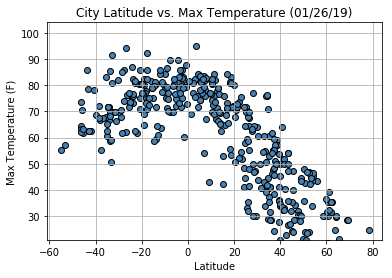

In [29]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker='o', c='steelblue', edgecolor='black')
plt.xlim(-61, 84)
plt.ylim(21,104)
plt.title(f"City Latitude vs. Max Temperature ({current_date2})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
sns.set

plt.savefig("Outputs/lat_temp_plot.png")
plt.show()

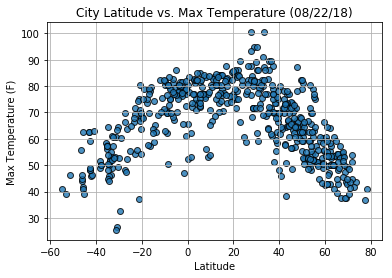

#### Latitude vs. Humidity Plot

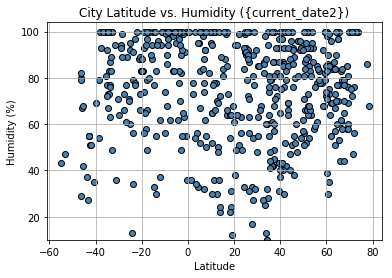

In [31]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker='o', c='steelblue', edgecolor='black')
plt.xlim(-61, 84)
plt.ylim(10,104)
plt.title("City Latitude vs. Humidity ({current_date2})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
sns.set

plt.savefig("Outputs/lat_humidity_plot.png")
plt.show()

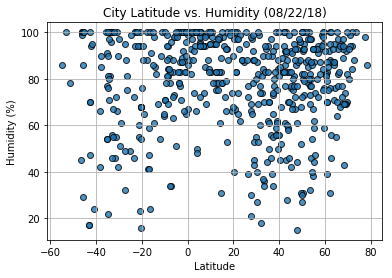

#### Latitude vs. Cloudiness Plot

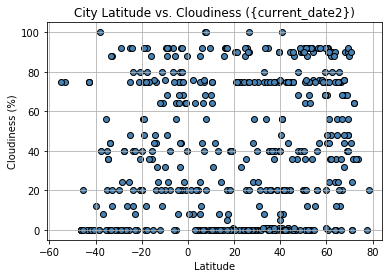

In [32]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker='o', c='steelblue', edgecolor='black')
plt.xlim(-61, 84)
plt.ylim(-5,105)
plt.title("City Latitude vs. Cloudiness ({current_date2})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
sns.set

plt.savefig("Outputs/lat_cloud_plot.png")
plt.show()

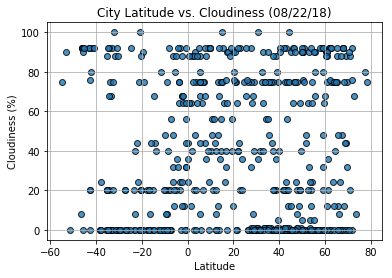

#### Latitude vs. Wind Speed Plot

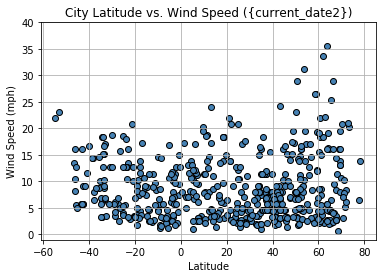

In [33]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker='o', c='steelblue', edgecolor='black')
plt.xlim(-61, 85)
plt.ylim(-1,40)
plt.title("City Latitude vs. Wind Speed ({current_date2})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
sns.set

plt.savefig("Outputs/lat_wind_plot.png")
plt.show()

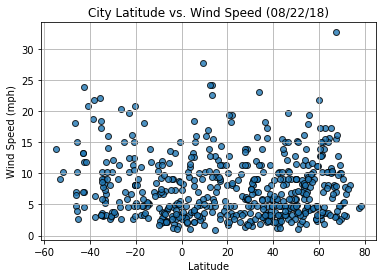

In [ ]:
# Analysis

#1. As expected, the maximum temperature is higher the closer the location is the equator (0 degrees latitude)
#2. There is low level of clouds from 20 to 40 and -20 to -40 degrees latitude. These latitudes are just beyond the Tropics (+-23 degrees latitude).
#   This makes sense as this is generally where you will find most of the world's deserts (i.e. the Sahara, Patagonia, Arabian, etc.).
#3. In relation to the above point, the humidity is conversely very high between -20 and 20 degrees latitude (i.e. the Tropics),
#   where you will find the majority of the world's rainforests (Amazon, Congo, etc.).